# Part 1: Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [177]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10835,FR Forms,BUSINESS,4.193338,0.0,9.6M,10+,0,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53M,"5,000+",0,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3.6M,100+,0,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3.0,9.5M,"1,000+",0,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114.0,Varies with device,"1,000+",0,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [17]:
df1 = pd.read_csv('googleplaystore_user_reviews.csv')
df1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [18]:
df.shape

(10841, 13)

In [19]:
df1.shape

(64295, 5)

In [182]:
# Filtering to remove rows with 'Varies with device' in the 'Size' column
df = df[df['Size'] != 'Varies with device']

In [184]:
df['Category'].value_counts()

FAMILY                 1473
TOOLS                   572
GAME                    571
MEDICAL                 347
BUSINESS                332
PERSONALIZATION         325
LIFESTYLE               287
FINANCE                 259
PRODUCTIVITY            246
SPORTS                  238
COMMUNICATION           195
HEALTH_AND_FITNESS      190
BOOKS_AND_REFERENCE     175
NEWS_AND_MAGAZINES      171
SOCIAL                  161
PHOTOGRAPHY             155
DATING                  147
TRAVEL_AND_LOCAL        141
SHOPPING                138
VIDEO_PLAYERS            91
MAPS_AND_NAVIGATION      85
FOOD_AND_DRINK           79
EDUCATION                78
LIBRARIES_AND_DEMO       75
AUTO_AND_VEHICLES        65
EVENTS                   57
HOUSE_AND_HOME           56
ART_AND_DESIGN           56
PARENTING                52
WEATHER                  50
ENTERTAINMENT            48
BEAUTY                   46
COMICS                   41
Name: Category, dtype: int64

In [20]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [21]:
df1.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [24]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [25]:
df1.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [26]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [176]:
df['Size'].max()

'Varies with device'

In [28]:
# Calculate the mean value of non-null ratings
mean_rating = df['Rating'].mean()

# Fill null values in 'Ratings' column with the mean value
df['Rating'].fillna(mean_rating, inplace=True)

In [29]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [31]:
df = df.dropna()

In [32]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [34]:
df.duplicated().sum()

483

In [35]:
df = df.drop_duplicates()

In [36]:
df.duplicated().sum()

0

In [37]:
df.shape

(10346, 13)

In [38]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [39]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [185]:
# Grouping by 'Category' and summing the 'Reviews' for each category
category_reviews = df.groupby('Category')['Reviews'].sum().reset_index()

# Finding the category with the highest sum of reviews
category_with_highest_reviews = category_reviews.loc[category_reviews['Reviews'].idxmax()]

# Displaying the category with the highest reviews
print("Category with Highest Reviews:")
print(category_with_highest_reviews)

Category with Highest Reviews:
Category        FAMILY
Reviews     14202095.0
Name: 11, dtype: object


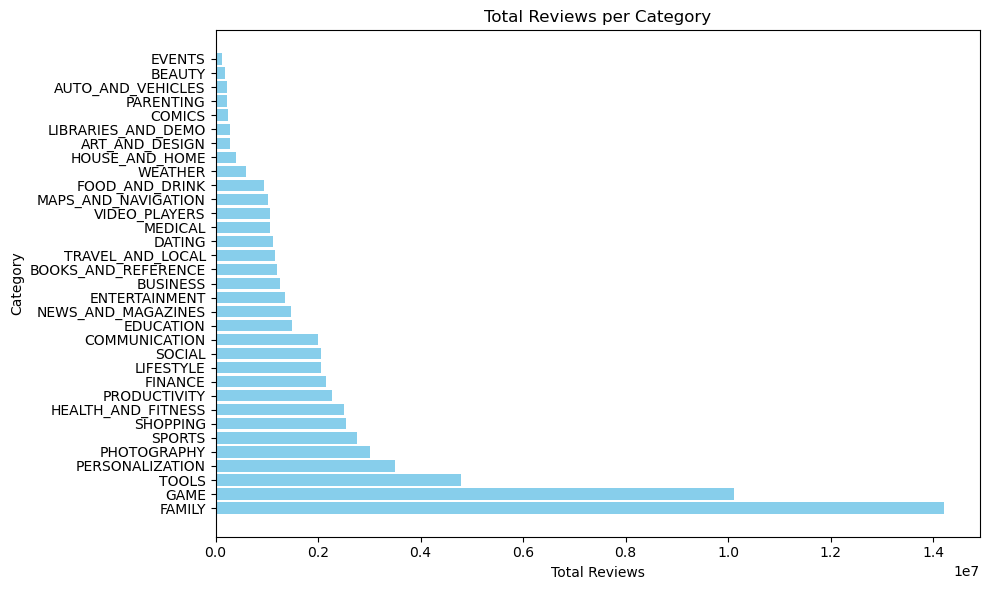

In [186]:
# Sorting the categories based on total reviews in descending order
sorted_categories = category_reviews.sort_values(by='Reviews', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_categories['Category'], sorted_categories['Reviews'], color='skyblue')
plt.xlabel('Total Reviews')
plt.ylabel('Category')
plt.title('Total Reviews per Category')
plt.tight_layout()
plt.show()

In [41]:
df['Price'].value_counts()

0          9584
$0.99       144
$2.99       125
$1.99        73
$4.99        70
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [42]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [43]:
df['Reviews'].value_counts()

0          591
1          271
2          213
3          170
4          137
          ... 
527247       1
240475       1
5282558      1
654418       1
398307       1
Name: Reviews, Length: 5999, dtype: int64

In [44]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [45]:
df['Reviews'] = df['Reviews'].astype('float64')

In [46]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<AxesSubplot:>

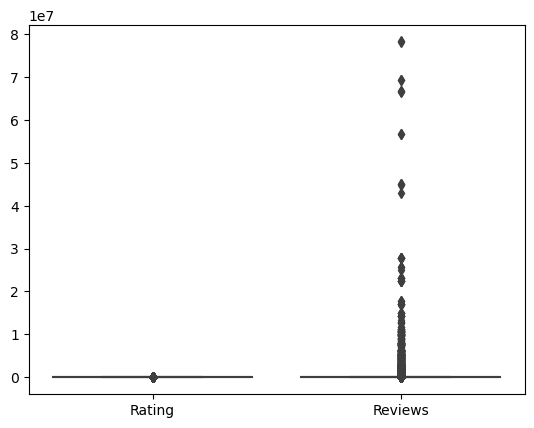

In [47]:
sns.boxplot(data=df)

In [50]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove rows containing outliers
df = df[~outliers]



/var/folders/5h/h4vpmp015hj4llck4ly707n40000gn/T/ipykernel_81113/2973612670.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


In [52]:
df.shape

(7761, 13)

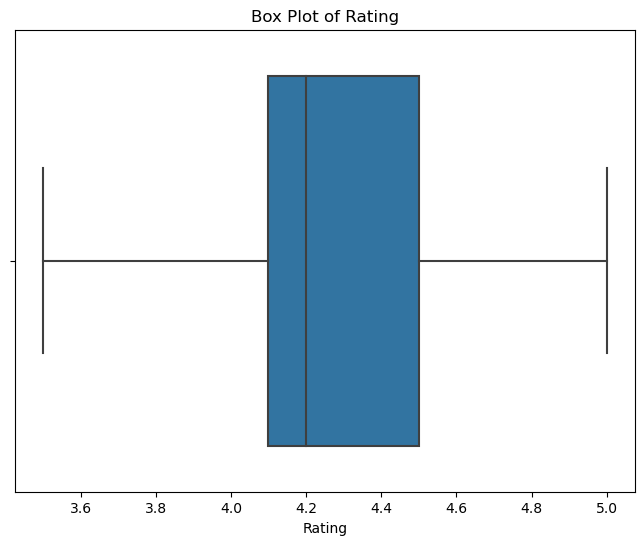

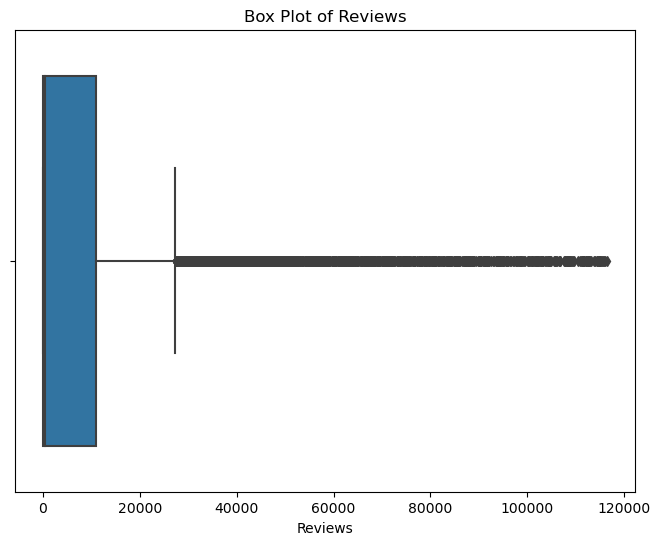

In [53]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


for column in numerical_columns:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [172]:
# Calculate the average rating
average_rating = df['Rating'].mean()
print("Average Rating:", average_rating)

Average Rating: 4.262565898779736


In [54]:
# Now for df1 
df1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [56]:
df1.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [57]:
df1.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [58]:
df1 = df1.dropna()

In [59]:
df1.shape

(37427, 5)

In [60]:
df1.duplicated().sum()

7735

In [61]:
df1 = df1.drop_duplicates()

In [62]:
df1.duplicated().sum()

0

In [63]:
df1.shape

(29692, 5)

<AxesSubplot:>

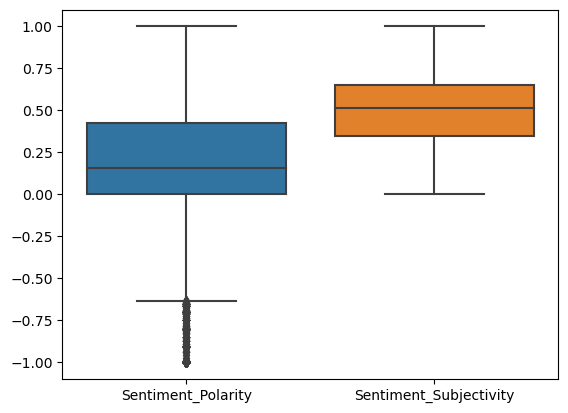

In [65]:
sns.boxplot(data=df1)

In [70]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove rows containing outliers
df1 = df1[~outliers]

/var/folders/5h/h4vpmp015hj4llck4ly707n40000gn/T/ipykernel_81113/1752581156.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)


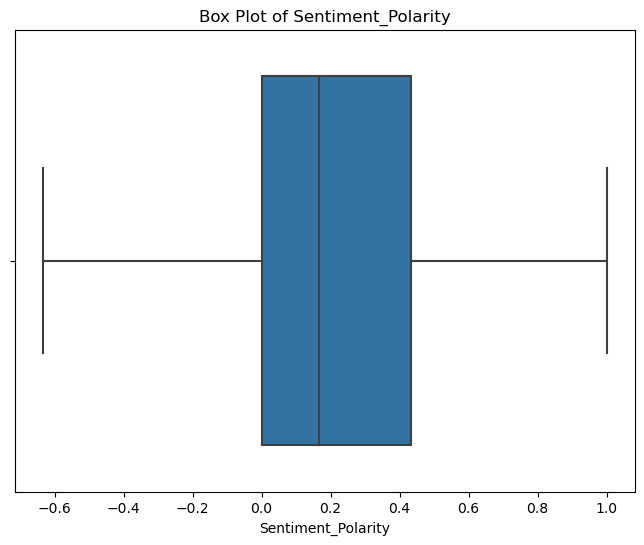

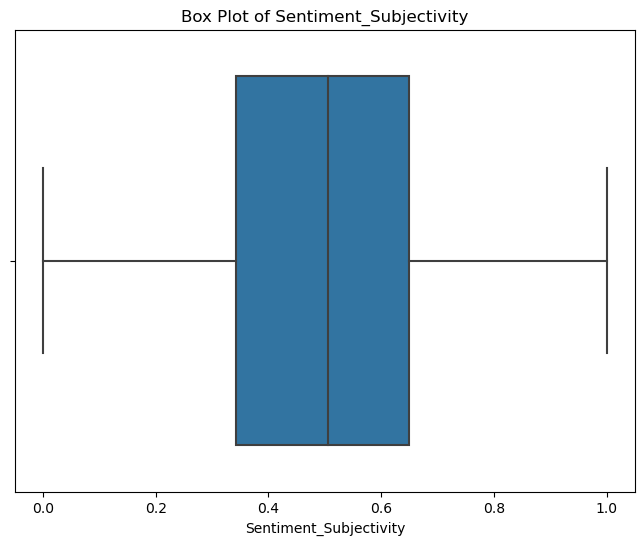

In [72]:
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns


for column in numerical_columns:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df1[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

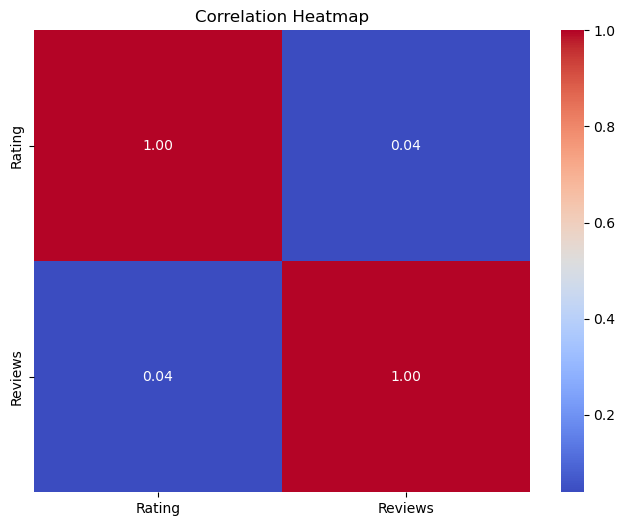

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

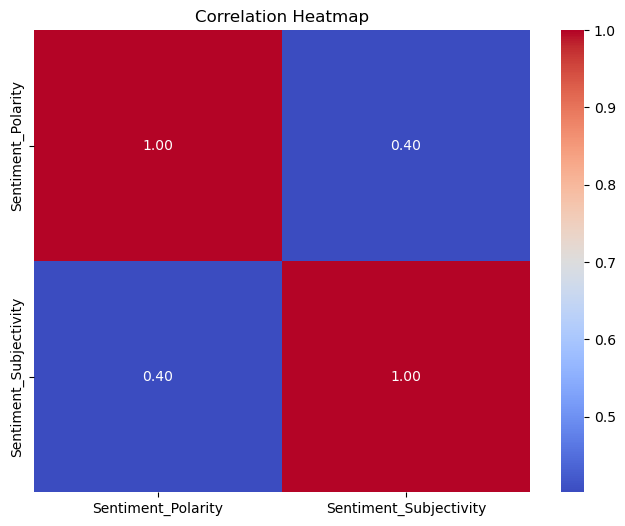

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [76]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167.0,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.193338,0.0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3.0,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


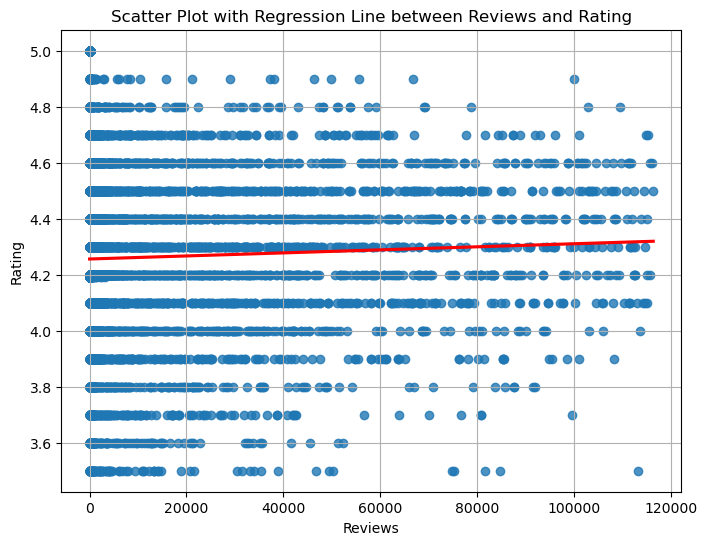

In [82]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Reviews', y='Rating', scatter=True, ci=None, line_kws={'color':'red'})
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Scatter Plot with Regression Line between Reviews and Rating')
plt.grid(True)
plt.show()

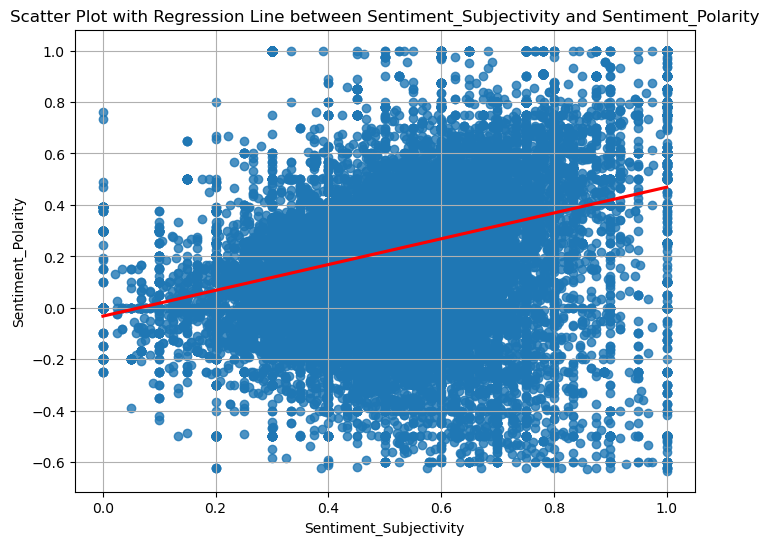

In [85]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df1, x='Sentiment_Subjectivity', y='Sentiment_Polarity', scatter=True, ci=None, line_kws={'color':'red'})
plt.xlabel('Sentiment_Subjectivity')
plt.ylabel('Sentiment_Polarity')
plt.title('Scatter Plot with Regression Line between Sentiment_Subjectivity and Sentiment_Polarity')
plt.grid(True)
plt.show()

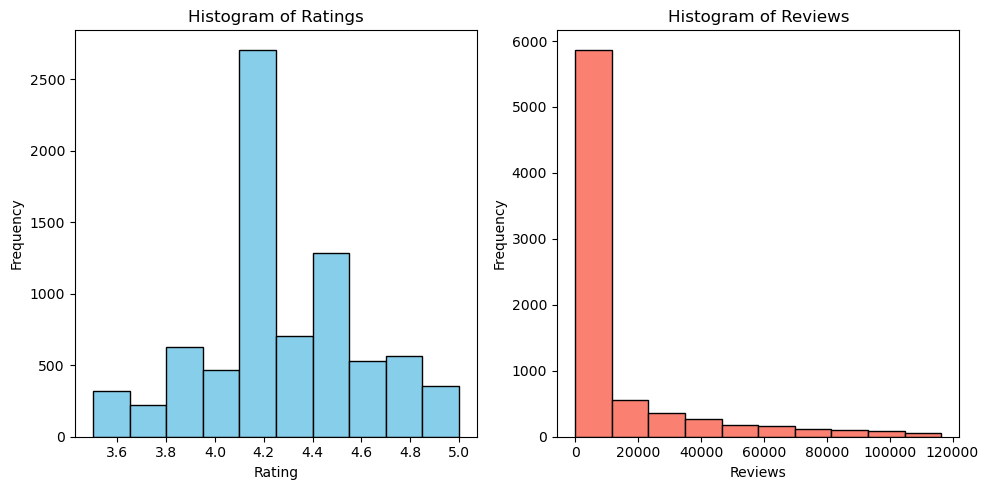

In [86]:
plt.figure(figsize=(10, 5))

# Histogram for 'Rating'
plt.subplot(1, 2, 1)
plt.hist(df['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# Histogram for 'Reviews'
plt.subplot(1, 2, 2)
plt.hist(df['Reviews'], bins=10, color='salmon', edgecolor='black')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Histogram of Reviews')

plt.tight_layout()
plt.show()

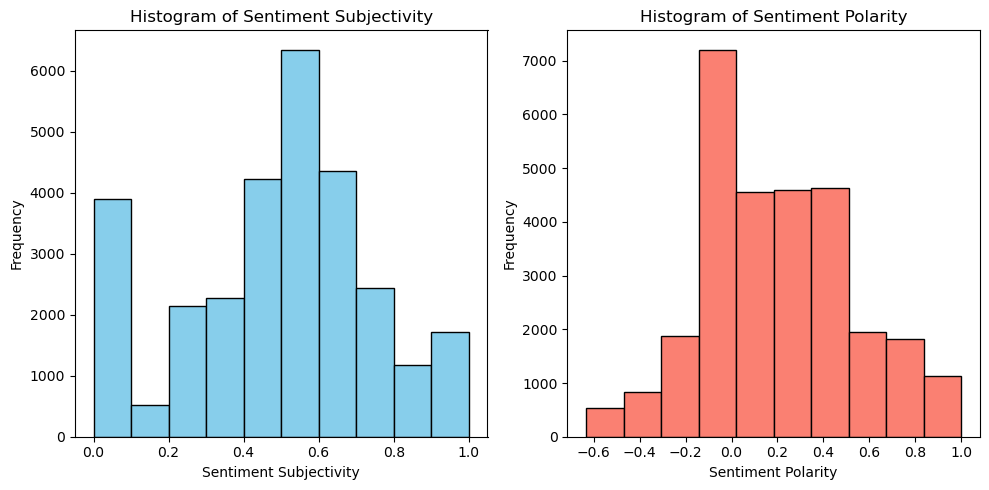

In [88]:
plt.figure(figsize=(10, 5))

# Histogram for 'Sentiment_Subjectivity'
plt.subplot(1, 2, 1)
plt.hist(df1['Sentiment_Subjectivity'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Subjectivity')

# Histogram for 'Sentiment_Polarity'
plt.subplot(1, 2, 2)
plt.hist(df1['Sentiment_Polarity'], bins=10, color='salmon', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Polarity')

plt.tight_layout()
plt.show()

In [93]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167.0,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.193338,0.0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3.0,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


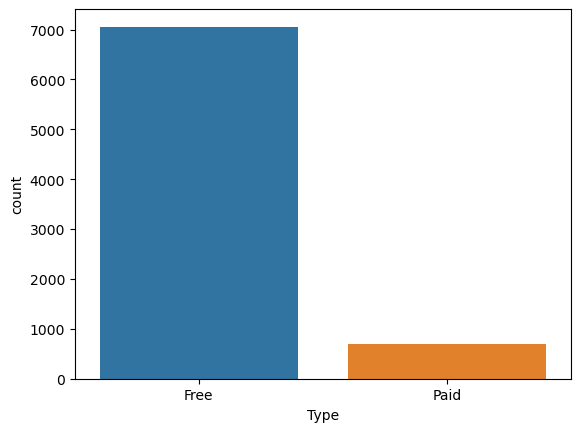

In [98]:
sns.countplot(data=df, x='Type');

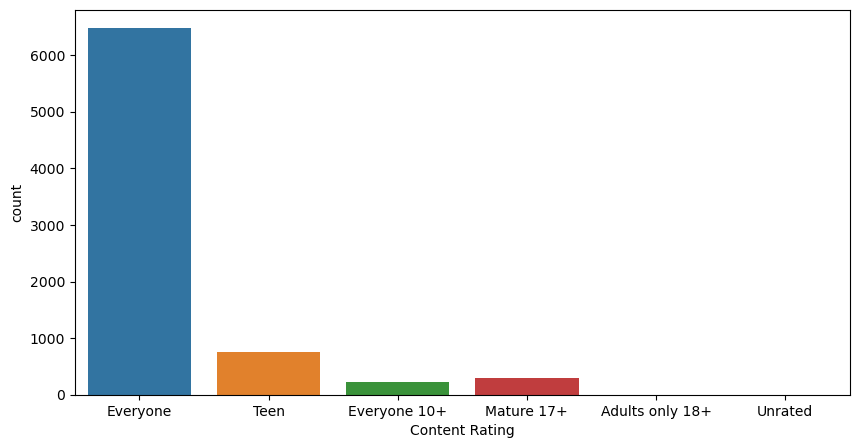

In [100]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Content Rating');

In [104]:
df1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


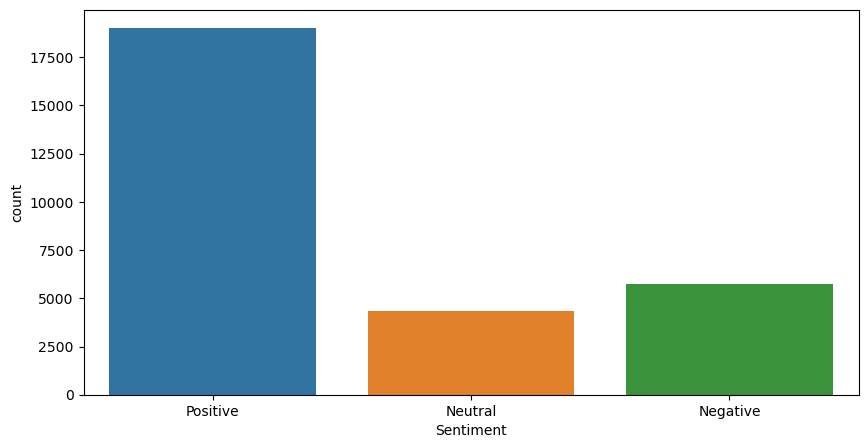

In [159]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df1, x='Sentiment');

# Part 2: Data Preprocessing

In [160]:
# Now Merging Datasets 
merged_df = pd.merge(df, df1, on='App', how='inner')  # Inner join on 'App'

# Displaying the merged DataFrame
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,omgggggg,Neutral,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It cute.,Positive,0.500000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19612,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369.0,Varies with device,"1,000,000+",0,0,Everyone,News & Magazines,"July 28, 2018",Varies with device,Varies with device,"Good source news, turn push notifications, exp...",Positive,0.450000,0.475000
19613,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369.0,Varies with device,"1,000,000+",0,0,Everyone,News & Magazines,"July 28, 2018",Varies with device,Varies with device,"This is always a very nice application, but it...",Positive,0.390000,0.666667
19614,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369.0,Varies with device,"1,000,000+",0,0,Everyone,News & Magazines,"July 28, 2018",Varies with device,Varies with device,Many items are suddenly premium. I get it on t...,Positive,0.145369,0.570644
19615,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369.0,Varies with device,"1,000,000+",0,0,Everyone,News & Magazines,"July 28, 2018",Varies with device,Varies with device,More and more videos instead of articles. Ever...,Positive,0.105556,0.538889


In [161]:
# label encoding categorical values
label_encoder = LabelEncoder()

merged_df['Type'] = label_encoder.fit_transform(merged_df['Type'])
merged_df['Sentiment'] = label_encoder.fit_transform(merged_df['Sentiment'])

In [162]:
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,0,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,1,0.000000,0.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,2,0.500000,0.600000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,omgggggg,1,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It cute.,2,0.500000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19612,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369.0,Varies with device,"1,000,000+",0,0,Everyone,News & Magazines,"July 28, 2018",Varies with device,Varies with device,"Good source news, turn push notifications, exp...",2,0.450000,0.475000
19613,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369.0,Varies with device,"1,000,000+",0,0,Everyone,News & Magazines,"July 28, 2018",Varies with device,Varies with device,"This is always a very nice application, but it...",2,0.390000,0.666667
19614,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369.0,Varies with device,"1,000,000+",0,0,Everyone,News & Magazines,"July 28, 2018",Varies with device,Varies with device,Many items are suddenly premium. I get it on t...,2,0.145369,0.570644
19615,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369.0,Varies with device,"1,000,000+",0,0,Everyone,News & Magazines,"July 28, 2018",Varies with device,Varies with device,More and more videos instead of articles. Ever...,2,0.105556,0.538889


# Part 3: Linear Regression Model

In [163]:
non_numeric_columns = merged_df.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

# Drop non-numeric columns from the DataFrame
merged_num = merged_df.drop(columns=non_numeric_columns)

In [164]:
merged_num.dtypes

Rating                    float64
Reviews                   float64
Type                        int64
Sentiment                   int64
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [165]:
X = merged_num.drop(columns=['Rating'])  # Features excluding the target column
y = merged_num['Rating']  # Target variable

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15693, 5)
Shape of X_test: (3924, 5)
Shape of y_train: (15693,)
Shape of y_test: (3924,)


In [166]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R-squared (R2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


R-squared (R2): 0.059122849235993646
Mean Squared Error (MSE): 0.06935313149935177
Mean Absolute Error (MAE): 0.2083986283849001


In [167]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Display the coefficients and intercept
print("Intercept:", intercept)
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

Intercept: 4.153931941701198
Coefficients:
Reviews: 1.5703213202098438e-06
Type: 0.05997744887990322
Sentiment: 0.02591634330110293
Sentiment_Polarity: 0.07000845519310243
Sentiment_Subjectivity: 0.02441222840782634


In [168]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]}  
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [169]:


# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R-squared (R2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R2): 0.05912018573103872
Mean Squared Error (MSE): 0.06935332782935005
Mean Absolute Error (MAE): 0.20839781261543872


In [170]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform hyperparameter tuning (Ridge Regression with GridSearchCV)
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Example values for alpha
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the scaled test set
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R-squared (R2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R2): 0.059097152886853244
Mean Squared Error (MSE): 0.06935502560665317
Mean Absolute Error (MAE): 0.20840731322319256


# Part 4: Conclusion and Recommendations

## Insights 
### Average Rating of Apps is 4.2
### Most people gave positive reviews and neutral reviews are less than negative
### Most apps are availble to all age groups 
### R-squared (R2): 0.059097152886853244
### Mean Squared Error (MSE): 0.06935502560665317
### Mean Absolute Error (MAE): 0.20840731322319256
### Model's predictions are close to the actual ratings on average (indicated by lower MSE and MAE values)
### Mostly apps are categorized for families and family catergory has highest reviews

## Recommedations 
### Negative Reviews are more than Neutral they should focus on reducing negative reviews
### Average app rating is 4.2 which can be increased to 4.5+
